In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import time
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
features = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
           'V21','V22','V23','V24','V25','V26','V27','V28']
df = data[features]

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'time-amount')

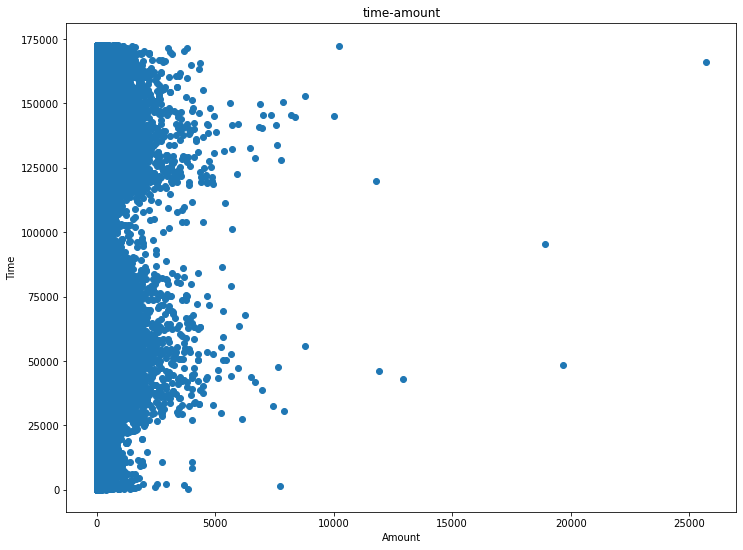

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(data.iloc[:,29],data.iloc[:,0])
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('time-amount')


Frauds: 492 ; 0.17 %
Non Frauds: 284315 ; 99.83 %


Text(0.5, 1.0, 'Class Distribution')

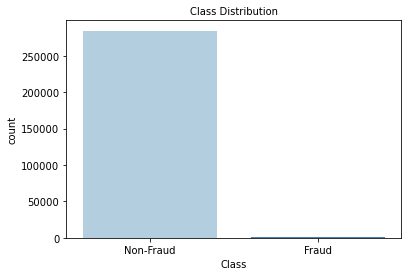

In [8]:
n_frauds = len(data[data['Class'] ==1])
n_no_frauds = len(data[data['Class']==0])
fraud_percentage = round(n_frauds/len(data['Class']) *100,2)
non_frauds_percentage = round(n_no_frauds/len(data['Class']) *100,2)
print('Frauds:',n_frauds,";",fraud_percentage,"%")
print('Non Frauds:',n_no_frauds,";",non_frauds_percentage,"%")

plt.subplots(figsize=(6,4))
sns.countplot('Class',data=data,palette='Blues')
plt.xticks([0,1],['Non-Fraud','Fraud'])
plt.title('Class Distribution',fontsize=10)

In [9]:
scaler = StandardScaler()
scaled_time = scaler.fit_transform(data['Time'].values.reshape(-1,1))
scaled_amount = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time','Amount'],axis=1,inplace=True)
data.insert(0,'scaled_amount',scaled_amount)
data.insert(0,'scaled_time',scaled_time)


In [10]:
data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
pca=PCA()

In [12]:
pca.fit(data)

PCA()

In [13]:
pca.explained_variance_ratio_

array([1.20876112e-01, 9.65384615e-02, 7.92461270e-02, 6.54821628e-02,
       6.09018841e-02, 5.49211803e-02, 4.98561273e-02, 4.37235149e-02,
       3.69192225e-02, 3.68673872e-02, 3.58071322e-02, 3.07819401e-02,
       3.02985997e-02, 2.84465044e-02, 2.65949934e-02, 2.34646795e-02,
       2.23613219e-02, 2.17350401e-02, 2.11844820e-02, 2.00707332e-02,
       1.75266165e-02, 1.65517676e-02, 1.30899774e-02, 1.19455187e-02,
       1.11915260e-02, 7.18619252e-03, 6.58206825e-03, 4.99595551e-03,
       3.33089858e-03, 1.49669369e-03, 2.51787291e-05])

Text(0, 0.5, 'Cumulative explained variance')

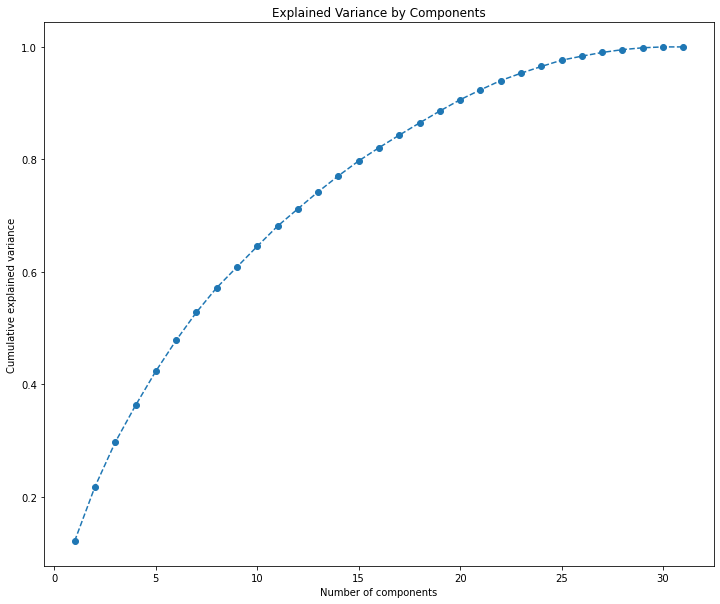

In [14]:
plt.figure(figsize=(12,10))
plt.plot(range(1,32),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [15]:
pca=PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [16]:
pca.components_

array([[-7.93628192e-02,  2.16857339e-01, -9.56469805e-01,
        -1.53589169e-01, -1.13825864e-02,  2.15970439e-02,
        -6.56124819e-02,  3.16529088e-02,  4.04944908e-02,
        -9.16519637e-03, -3.55477513e-03, -9.60903682e-03,
         6.89197114e-03, -4.04932900e-03,  2.13151648e-03,
         4.77404273e-03,  4.08491181e-03, -4.96830120e-04,
         1.93540160e-03,  1.41036174e-04, -3.57777350e-03,
         1.78016749e-02,  4.17857234e-03, -5.39203644e-03,
        -4.98700300e-03,  4.04855942e-04,  1.14933858e-03,
         3.35483227e-04,  7.08565359e-04,  2.54984876e-04,
         1.85560444e-03],
       [ 7.56688075e-02,  4.04776597e-01,  2.41149401e-01,
        -8.22965049e-01, -2.06215663e-01,  3.92054972e-02,
        -1.57589412e-01,  7.95058780e-02,  1.26957004e-01,
        -3.06685964e-02, -1.04077806e-02, -2.13533201e-02,
        -9.00368623e-03,  2.52338719e-03, -1.35299843e-03,
         2.64548001e-03, -5.94687939e-03, -2.28791420e-04,
        -9.04357652e-04,  7.27

In [17]:
data_pca = pd.DataFrame(data=pca.components_,columns=data.columns.values,index=['Feature_1','Feature_2'])
data_pca.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Feature_1,-0.079363,0.216857,-0.956470,-0.153589,-0.011383,0.021597,-0.065612,0.031653,0.040494,-0.009165,...,0.017802,0.004179,-0.005392,-0.004987,0.000405,0.001149,0.000335,0.000709,0.000255,0.001856
Feature_2,0.075669,0.404777,0.241149,-0.822965,-0.206216,0.039205,-0.157589,0.079506,0.126957,-0.030669,...,0.040127,0.012977,-0.004224,-0.009406,0.000186,-0.006678,-0.000730,0.001519,0.000372,-0.001488


([<matplotlib.axis.YTick at 0x1e5830a8a90>,
 [Text(0, 0, 'Feature_1'), Text(0, 1, 'Feature_2')])

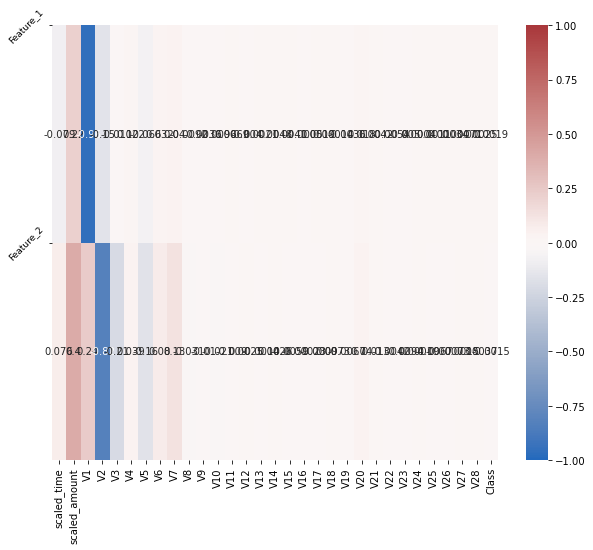

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data_pca,vmin=-1,vmax=1,cmap='vlag',annot=True)
plt.yticks([0,1],['Feature_1','Feature_2'],rotation=45,fontsize=9)

<AxesSubplot:>

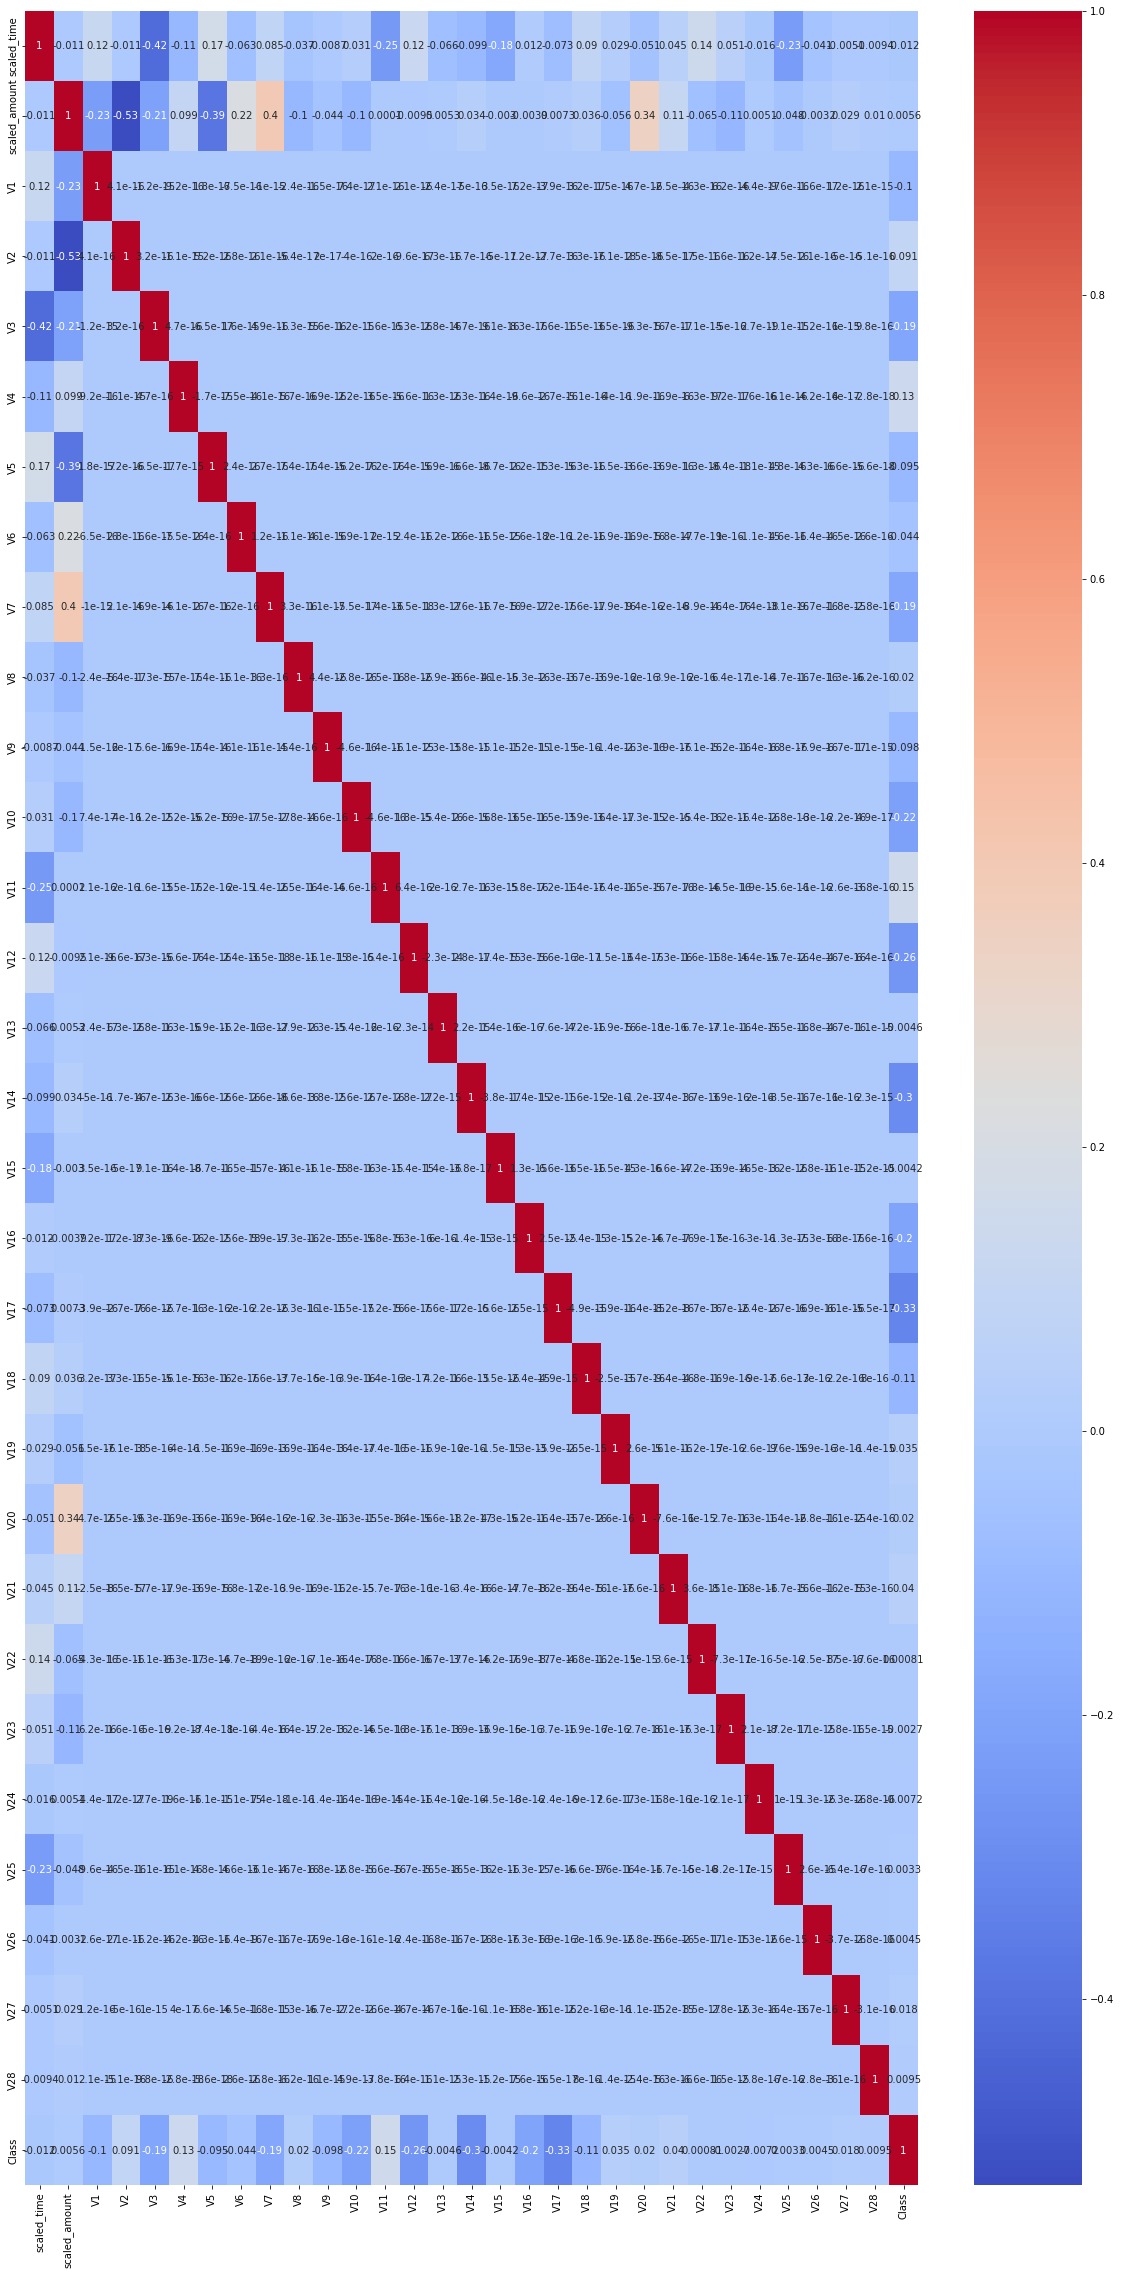

In [39]:
corr  = data.corr()
plt.figure(figsize=(20,40))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [19]:
pca.transform(data)
score = pca.transform(data)

In [20]:
score

array([[ 1.57167224, -0.67540474],
       [-1.0862334 , -0.28272567],
       [ 2.05335045,  1.07763822],
       ...,
       [-1.99845983,  1.21636845],
       [-0.04072303, -0.60468702],
       [ 0.5504861 ,  0.40175772]])

In [21]:
knn_palette = sns.color_palette(['#000C1F','#29757A'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963)]

In [22]:
data_f=pd.DataFrame(data=data_pca,)

In [23]:
data_df = pd.DataFrame(data=score,columns=['Feature_1','Feature_2'])
data_df['target'] = data['Class']
data_df.head()

,Feature_1,Feature_2,target
0,1.571672,-0.675405,0
1,-1.086233,-0.282726,0
2,2.053350,1.077638,0
3,1.150060,-0.427399,0
4,1.143798,-1.341997,0


In [24]:
data_df.shape

(284807, 3)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

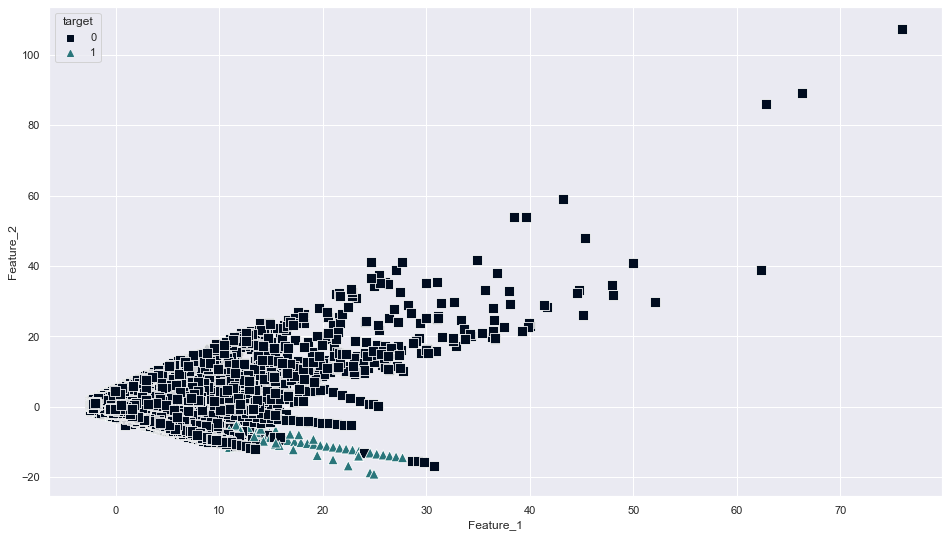

In [25]:
sns.set()
plt.figure(figsize=(16,9))

sns.scatterplot(x='Feature_1',y='Feature_2',data=data_df,hue='target',palette=knn_palette,markers=[',','^'],style='target',s=100)

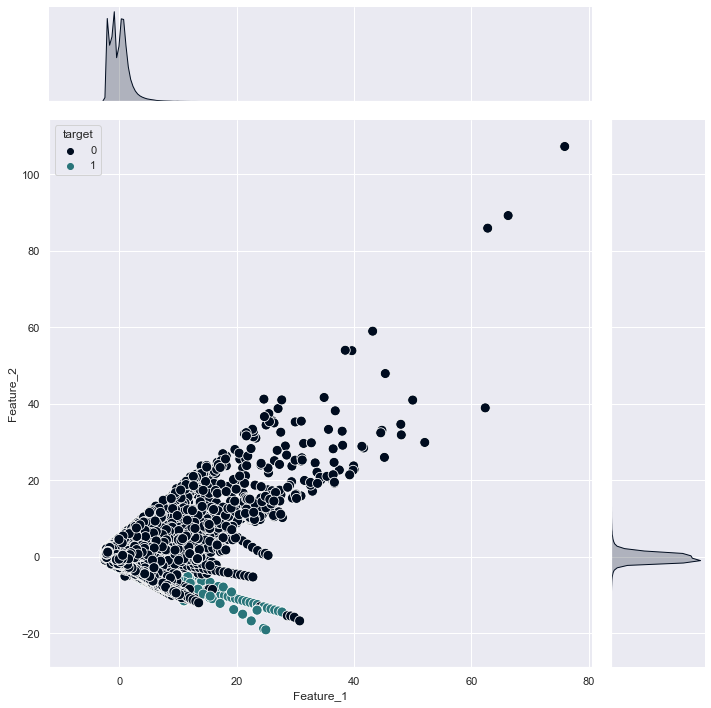

In [26]:
sns.set()

sns.jointplot(x='Feature_1',y='Feature_2',data=data_df,
              hue='target',palette=knn_palette,height=10,s=100,legend=True);

In [27]:
x_train,x_test,y_train,y_test = train_test_split(data_df[['Feature_1','Feature_2']],data_df[['target']],test_size=0.2,random_state=365,stratify=data_df[['target']])

In [28]:
x_train.shape

(227845, 2)

In [29]:
x_test.shape

(56962, 2)

In [30]:
parameters = {"n_neighbors":range(1,51),
             'weights':['uniform','distance']}

In [31]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=parameters,
                        scoring='accuracy')

In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
grid_search.best_params_

{'n_neighbors': 32, 'weights': 'distance'}

In [34]:
grid_search.best_score_

0.9984945906208168

In [35]:
clf = KNeighborsClassifier(n_neighbors=32,weights ='distance')

clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32, weights='distance')

In [36]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(56962,)

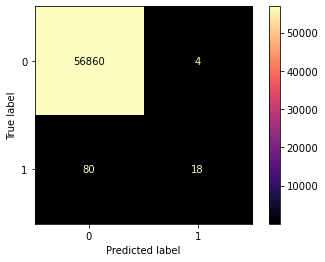

In [37]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=clf.classes_,cmap='magma');

In [38]:
print(classification_report(y_test,y_test_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.18      0.30        98

    accuracy                           1.00     56962
   macro avg       0.91      0.59      0.65     56962
weighted avg       1.00      1.00      1.00     56962

